#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.metrics import r2_score
from zipfile import ZipFile
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

#Loading and Reading the dataset

In [2]:
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
columns = [
    'Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
    'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution',
    'Heating Load', 'Cooling Load'
]

In [3]:
df = pd.read_excel(dataset_url, header=0, names=columns)

#Pre-processing the Data

In [4]:
#First we Drop all rows having null values
df = df.dropna()

In [5]:
#Now lets check if there any null values remains in the dataset
df.isnull().sum()

,0
Relative Compactness,0
Surface Area,0
Wall Area,0
Roof Area,0
Overall Height,0
Orientation,0
Glazing Area,0
Glazing Area Distribution,0
Heating Load,0
Cooling Load,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [7]:
# Just for assurance, if there is any null value remaining we will replace it with the mean of the column using imputer.
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df.iloc[:,1:3].values)

df.iloc[:,1:3] = imputer.transform(df.iloc[:,1:3].values)

In [8]:
df

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


###Checking the correlation between all the columns and selecting the best column for Heat Overload in Linear Regression.

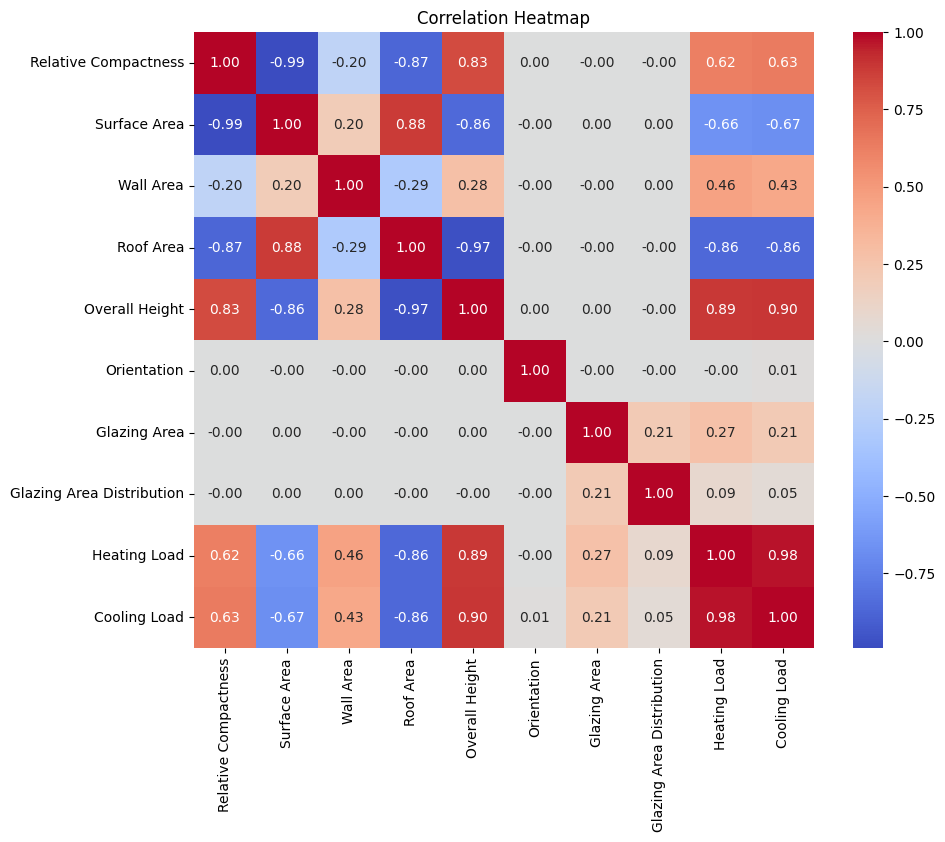

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

There is a good correlation between Overall Height and Heating Load but the spread of data in Overall Height is very less which makes sense. Hence we choose Relative Compactness.

###Checking Outliners

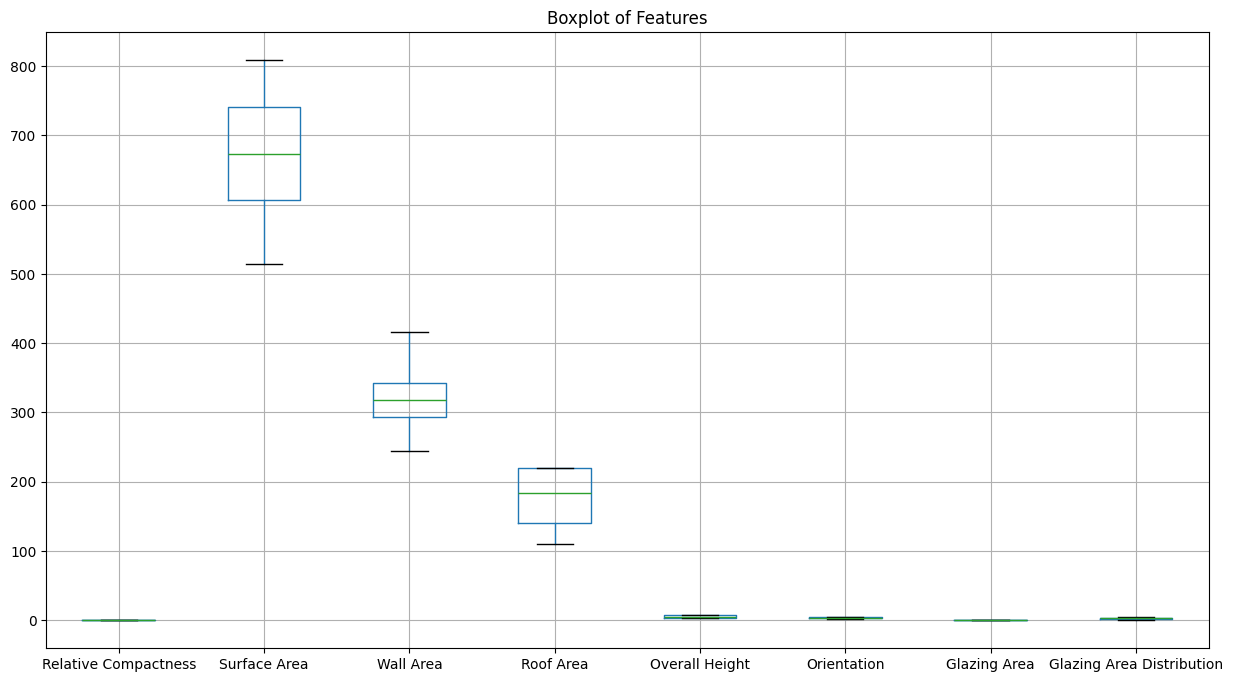

In [10]:
features = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
            'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']
plt.figure(figsize=(15, 8))
df.boxplot(column=features)
plt.title("Boxplot of Features")
plt.xticks()
plt.show()

###Handle outliers for 'Overall Height'

In [11]:
max_limit = df["Overall Height"].quantile(0.99)
min_limit = df["Overall Height"].quantile(0.01)
data = df[(df["Overall Height"] >= min_limit) & (df["Overall Height"] <= max_limit)]

##Manual Linear Regression Model

###Splitting the train and test data in 80:20 ratio for the model.

In [12]:
X = data[features]
y = data['Heating Load']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X, y

(array([[ 2.04177671, -1.78587489, -0.56195149, ..., -1.34164079,
         -1.76044698, -1.81457514],
        [ 2.04177671, -1.78587489, -0.56195149, ..., -0.4472136 ,
         -1.76044698, -1.81457514],
        [ 2.04177671, -1.78587489, -0.56195149, ...,  0.4472136 ,
         -1.76044698, -1.81457514],
        ...,
        [-1.36381225,  1.55394308,  1.12390297, ..., -0.4472136 ,
          1.2440492 ,  1.41133622],
        [-1.36381225,  1.55394308,  1.12390297, ...,  0.4472136 ,
          1.2440492 ,  1.41133622],
        [-1.36381225,  1.55394308,  1.12390297, ...,  1.34164079,
          1.2440492 ,  1.41133622]]),
 0      15.55
 1      15.55
 2      15.55
 3      15.55
 4      20.84
        ...  
 763    17.88
 764    16.54
 765    16.44
 766    16.48
 767    16.64
 Name: Heating Load, Length: 768, dtype: float64)

###Adding the bais term to both training and test data.

In [13]:
X_train_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

###Evaluating the normal equation to calculate weights

In [14]:
weights = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train
weights

array([ 22.21916911,  -3.18967855, -11.04117417,   5.07558147,
         6.28400751,   7.21642111,  -0.03626803,   2.68173981,
         0.32719875])

###Predicting the outcomes.

In [15]:
y_pred_manual = X_test_bias @ weights

###Evaluating the model by calculating the RMSE, MSE, R2_score

In [16]:
mse= mean_squared_error(y_test, y_pred_manual)
r2= r2_score(y_test, y_pred_manual)
rmse = root_mean_squared_error(y_test, y_pred_manual)

print('Test MSE =', mse)
print('Test RMSE =', rmse)
print('Test R2 score =', r2)

Test MSE = 10.760222563898111
Test RMSE = 3.280277818096832
Test R2 score = 0.8967670167269813


###Ploting the graph for the y_test and y_pred_manual

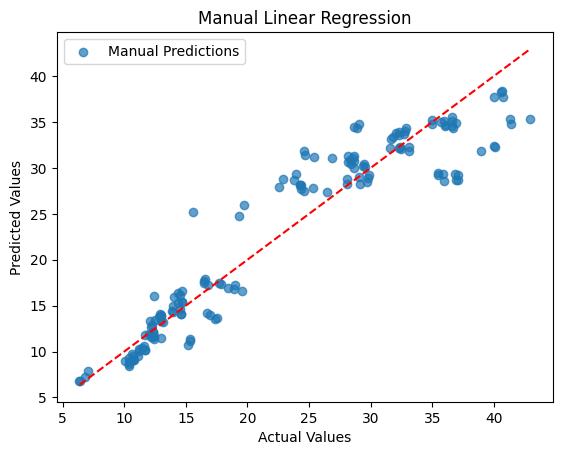

In [17]:
plt.figure()
plt.scatter(y_test, y_pred_manual, alpha=0.7, label="Manual Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Manual Linear Regression")
plt.legend()

###Training Multivariate Linear Regression Model

In [18]:
X = df.iloc[:,:8]
y = df.iloc[:,8]


In [19]:
X

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [20]:
y

,Heating Load
0,15.55
1,15.55
2,15.55
3,15.55
4,20.84
...,...
763,17.88
764,16.54
765,16.44
766,16.48


###Splitting the data into test and train in ratio 80:20 using train_test_split method from the sklearn module.

In [21]:
Xtrain, Xtest, ytrain, ytest=train_test_split(X, y, test_size = 0.3, random_state=0)

In [22]:
ytrain.shape

(537,)

###Training and fitting the data into the model

In [23]:
reg= LinearRegression()
reg.fit(Xtrain, ytrain)

LinearRegression()

###Now, lets first test the training data itself and calculate the RMSE, MSE, R2_score

In [24]:
ytrainpredict=reg.predict(Xtrain)
mse= mean_squared_error(ytrain, ytrainpredict)
r2= r2_score(ytrain, ytrainpredict)
rmse = root_mean_squared_error(ytrain, ytrainpredict)

print('Train MSE =', mse)
print('Train RMSE =', rmse)
print('Train R2 score =', r2)

Train MSE = 8.257775505526839
Train RMSE = 2.873634546271818
Train R2 score = 0.9175708228404862


###Then we predict for the testing data and calculate the RMSE, MSE and R2__score.

In [25]:
ytestpredict = reg.predict(Xtest)
mse= mean_squared_error(ytest, ytestpredict)
r2= r2_score(ytest, ytestpredict)
rmse = root_mean_squared_error(ytest, ytestpredict)

print('Test MSE =', mse)
print('Test RMSE =', rmse)
print('Test R2 score =', r2)

Test MSE = 9.265529158558705
Test RMSE = 3.0439331724856746
Test R2 score = 0.9118632854449374


Printing the slope and bias

In [26]:
slope= reg.coef_
bias= reg.intercept_
print(slope, bias)

[-5.61908712e+01 -5.59383623e-02  4.02060419e-02 -4.80722021e-02
  3.99273805e+00 -5.80790626e-02  1.94140526e+01  1.73979467e-01] 72.70663804779464


###Plot for the ytest and ytestpred values

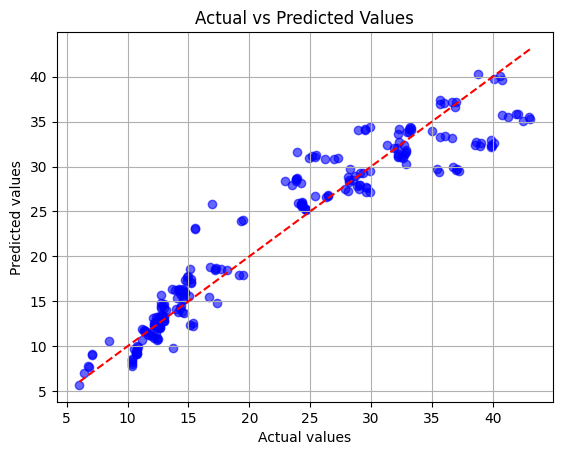

In [27]:
plt.figure()
plt.scatter(ytest, ytestpredict, color='blue', alpha=0.6)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid()
plt.show()

##Training the Ridge model for better analysis of data.

In [28]:
ridge_md = Ridge(alpha = 0.1)

In [29]:
ridge_md.fit(Xtrain, ytrain)

Ridge(alpha=0.1)

###Repeating the same process as we did for multivariate Linear Reg. Model

In [30]:
ytrainpred = ridge_md.predict(Xtrain)
rmse = root_mean_squared_error(ytrain, ytrainpred)
mse = mean_squared_error(ytrain, ytrainpred)
r2 = r2_score(ytrain, ytrainpred)

print("Train RMSE = ",rmse)
print("Train MSE = ",mse)
print("Train R2 = ",r2)

Train RMSE =  2.897003535553067
Train MSE =  8.39262948500697
Train R2 =  0.9162247094037872


In [31]:
ytestpred = ridge_md.predict(Xtest)
rmse = root_mean_squared_error(ytest, ytestpred)
mse = mean_squared_error(ytest, ytestpred)
r2 = r2_score(ytest, ytestpred)

print("Test RMSE = ",rmse)
print("Test MSE = ",mse)
print("Test R2 = ",r2)

Test RMSE =  3.107681276207221
Test MSE =  9.657682914488941
Test R2 =  0.9081329918959508


In [32]:
slope= ridge_md.coef_
bias= ridge_md.intercept_
print(slope, bias)

[-1.99929179e+01 -1.08747160e-02  3.92394942e-02 -2.50571060e-02
  4.71953315e+00 -6.47445714e-02  1.92113692e+01  1.80641601e-01] 7.248677945737239


##Ploting the Graph

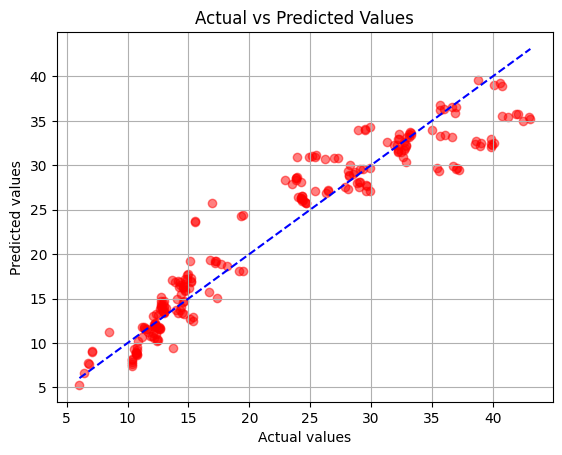

In [33]:
plt.figure()
plt.scatter(ytest, ytestpred, color= 'r', alpha = 0.5)
plt.plot([ytest.min(),ytest.max()],[ytest.min(),ytest.max()], color= 'b', ls= "--")
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid()
plt.show()

##Training the Lasso model for better analysis of data.

In [34]:
ls = Lasso(alpha = 0.1)

In [35]:
ls.fit(Xtrain, ytrain)

Lasso(alpha=0.1)

###We predict for the testing data and calculate the RMSE, MSE and R2__score.

In [36]:
ytestpred = ls.predict(Xtest)
rmse = root_mean_squared_error(ytest, ytestpred)
mse = mean_squared_error(ytest, ytestpred)
r2 = r2_score(ytest, ytestpred)

print("Test RMSE = ", rmse)
print("Test MSE = ", mse)
print("Test R2 = ", r2)

Test RMSE =  3.3562487589019807
Test MSE =  11.264405731631085
Test R2 =  0.8928493240254811


###Calculating the bias and slope.

In [37]:
slope= ls.coef_
bias= ls.intercept_
print(slope, bias)

[-0.00000000e+00 -0.00000000e+00  5.25092241e-02 -8.09598824e-03
  4.50582099e+00 -0.00000000e+00  1.35519277e+01  2.56907678e-01] -20.525727940103426


###Ploting the scatter plot for the actual and predicted values ofr Heat Overload

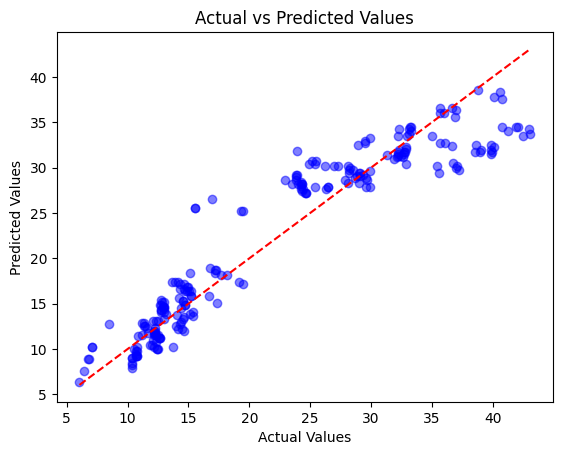

In [38]:
plt.figure()
plt.scatter(ytest, ytestpred, color= 'b', alpha = 0.5)
plt.plot([ytest.min(),ytest.max()], [ytest.min(),ytest.max()], color='r', ls= "--")
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

##Insights and Suggestions

### Extract feature importance from coefficients

In [39]:
weights

array([ 22.21916911,  -3.18967855, -11.04117417,   5.07558147,
         6.28400751,   7.21642111,  -0.03626803,   2.68173981,
         0.32719875])

In [40]:
feature_importance = pd.DataFrame({
    'Feature': ['Bias'] + features,
    'Coefficient (Manual)': weights
})
feature_importance = feature_importance.sort_values(by='Coefficient (Manual)', key=abs, ascending=False)

print("Feature Importance:\n", feature_importance)

Feature Importance:
                      Feature  Coefficient (Manual)
0                       Bias             22.219169
2               Surface Area            -11.041174
5             Overall Height              7.216421
4                  Roof Area              6.284008
3                  Wall Area              5.075581
1       Relative Compactness             -3.189679
7               Glazing Area              2.681740
8  Glazing Area Distribution              0.327199
6                Orientation             -0.036268


###Design Improvements

In [41]:
print("\nSuggestions for Energy Efficiency Improvements:")
if feature_importance['Coefficient (Manual)'].iloc[1] > 0:
    print("- Optimize wall area to minimize heating load.")
if feature_importance['Coefficient (Manual)'].iloc[2] > 0:
    print("- Improve roof insulation for better thermal efficiency.")
if feature_importance['Coefficient (Manual)'].iloc[3] > 0:
    print("- Consider glazing area adjustments to balance natural light and heat retention.")


Suggestions for Energy Efficiency Improvements:
- Improve roof insulation for better thermal efficiency.
- Consider glazing area adjustments to balance natural light and heat retention.
